<a href="https://colab.research.google.com/github/Vishnu955/TIME_SERIES_ANOMALY_DETECTION-A-DEEP_LEARNING_BASED_ENSEMBLE_MODEL/blob/main/NN_Exam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 3**

In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import gdown
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### **LOADING AND PREPARING DATA**

In [ ]:
# Downloading the file from Google Drive
path='/content/Final_News_DF_Labeled_ExamDataset.csv'
data = pd.read_csv(path)
data.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get features and labels
X = data.drop(columns=['LABEL']).values
y = data['LABEL'].values

# Encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:
#displaying samples of the labes and the features
print("Before Encoding (Labels):")
df_before = pd.DataFrame({'Labels': y})
print(df_before.head(10))

print("\nAfter One-Hot Encoding (Encoded Labels):")
df_after = pd.DataFrame(y_encoded, columns=encoder.categories_[0])
print(df_after.head(10))

print("\nFeatures (X):")
df_features = pd.DataFrame(X)
print(df_features.head(5))


Before Encoding (Labels):
     Labels
0  politics
1  politics
2  politics
3  politics
4  politics
5  politics
6  politics
7  politics
8  politics
9  politics

After One-Hot Encoding (Encoded Labels):
   football  politics  science
0       0.0       1.0      0.0
1       0.0       1.0      0.0
2       0.0       1.0      0.0
3       0.0       1.0      0.0
4       0.0       1.0      0.0
5       0.0       1.0      0.0
6       0.0       1.0      0.0
7       0.0       1.0      0.0
8       0.0       1.0      0.0
9       0.0       1.0      0.0

Features (X):
   0    1    2    3    4    5    6    7    8    9    ...  290  291  292  293  \
0    0    0    0    0    0    0    0    1    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0   

In [ ]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Before Scaling
print("Before Scaling (sample of 5 rows of X):")
df_before_scaling = pd.DataFrame(X[96:102])
print(df_before_scaling)

# After Scaling
print("\nAfter Scaling (sampe of rows of X_scaled):")
df_after_scaling = pd.DataFrame(X_scaled[96:102])
print(df_after_scaling)


Before Scaling (sample of 5 rows of X):
   0    1    2    3    4    5    6    7    8    9    ...  290  291  292  293  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    1    0    0   
5    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   294  295  296  297  298  299  
0    0    0    0    0    0    0  
1    0    0    1    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  
5    0    0    0    0    0    0  

[6 rows x 300 columns]

After Scaling (sampe of rows of X_scaled):
   0    1    2    3    4    5    6    7    8    9    ...  290       291  292  \
0  0.0  0.0  

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=39)
print("Shapes of Splits:")
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ",y_test.shape)



Shapes of Splits:
X_train shape:  (1194, 300)
X_test shape:  (299, 300)
y_train shape:  (1194, 3)
y_test shape:  (299, 3)


### **Training the models**

In [ ]:
# ANN model
ann_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ann_history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4164 - loss: 1.0577 - val_accuracy: 0.5920 - val_loss: 0.9261
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6953 - loss: 0.8653 - val_accuracy: 0.6656 - val_loss: 0.7678
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7768 - loss: 0.6162 - val_accuracy: 0.7090 - val_loss: 0.6886
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8336 - loss: 0.4633 - val_accuracy: 0.7324 - val_loss: 0.6794
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8624 - loss: 0.3666 - val_accuracy: 0.7191 - val_loss: 0.7002
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8978 - loss: 0.2906 - val_accuracy: 0.6923 - val_loss: 0.7394
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8985 - loss: 0.2823 - val_accuracy: 0.7258 - val_loss: 0.7804
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8962 - loss: 0.2403 - val_accuracy: 0.6789 - val_loss: 0.818

In [ ]:
# CNN
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=20, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4846 - loss: 1.0189 - val_accuracy: 0.6254 - val_loss: 0.8101
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7260 - loss: 0.7057 - val_accuracy: 0.6856 - val_loss: 0.7565
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7394 - loss: 0.5767 - val_accuracy: 0.6789 - val_loss: 0.7476
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7926 - loss: 0.4904 - val_accuracy: 0.6923 - val_loss: 0.7615
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8299 - loss: 0.4662 - val_accuracy: 0.6789 - val_loss: 0.7857
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8291 - loss: 0.4249 - val_accuracy: 0.7224 - val_loss: 0.8051
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8368 - loss: 0.3843 - val_accuracy: 0.7191 - val_loss: 0.8292
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8509 - loss: 0.3799 - val_accuracy: 0.7191 - v

In [ ]:
# LSTM
X_train_lstm = X_train[..., np.newaxis]
X_test_lstm = X_test[..., np.newaxis]

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.3140 - loss: 1.0994 - val_accuracy: 0.3244 - val_loss: 1.0979
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.3660 - loss: 1.0973 - val_accuracy: 0.4181 - val_loss: 1.0938
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.4026 - loss: 1.1085 - val_accuracy: 0.3411 - val_loss: 1.0996
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.3493 - loss: 1.0965 - val_accuracy: 0.3913 - val_loss: 1.0964
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.3500 - loss: 1.0950 - val_accuracy: 0.3913 - val_loss: 1.0950
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.3971 - loss: 1.0925 - val_accuracy: 0.4147 - val_loss: 1.0886
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.4003 - loss: 1.0847 - val_accuracy: 0.4548 - val_loss: 1.0592
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.3768 - loss: 1.0767 - val_accuracy: 0.4147 -

### **Evaluation and Comparison**

In [ ]:
# Evaluating models
ann_eval = ann_model.evaluate(X_test, y_test)
cnn_eval = cnn_model.evaluate(X_test_cnn, y_test)
lstm_eval = lstm_model.evaluate(X_test_lstm, y_test)

print("ANN Accuracy: ",ann_eval[1])
print("CNN Accuracy: ",cnn_eval[1])
print("LSTM Accuracy: ",lstm_eval[1])


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 1.3255 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6906 - loss: 1.2495 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4969 - loss: 1.0329
ANN Accuracy:  0.695652186870575
CNN Accuracy:  0.6989966630935669
LSTM Accuracy:  0.5050167441368103


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


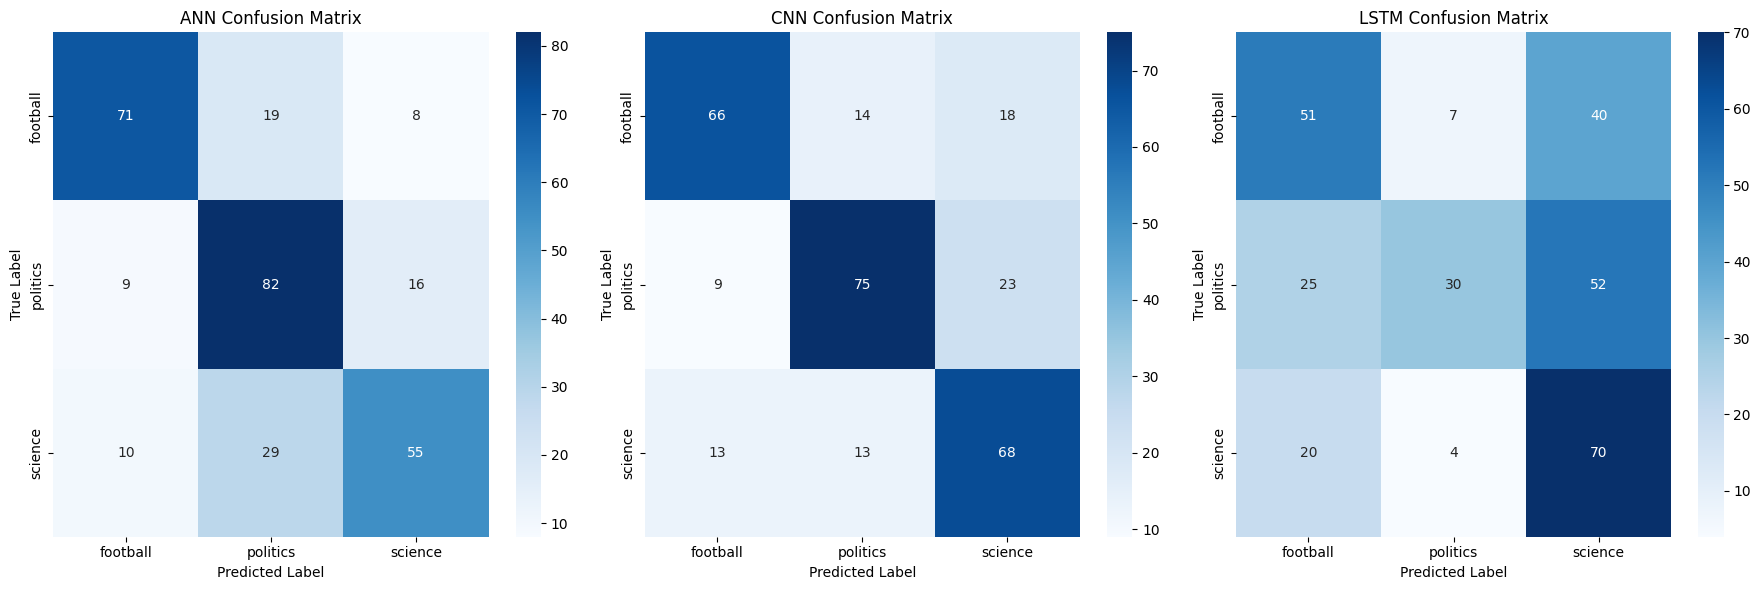

In [ ]:
# ANN confusion matrix
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm_ann = confusion_matrix(y_true, y_pred_ann)

# CNN confusion matrix
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
cm_cnn = confusion_matrix(y_true, y_pred_cnn)

# LSTM confusion matrix
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
cm_lstm = confusion_matrix(y_true, y_pred_lstm)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
axes[0].set_title("ANN Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
axes[1].set_title("CNN Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
axes[2].set_title("LSTM Confusion Matrix")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()


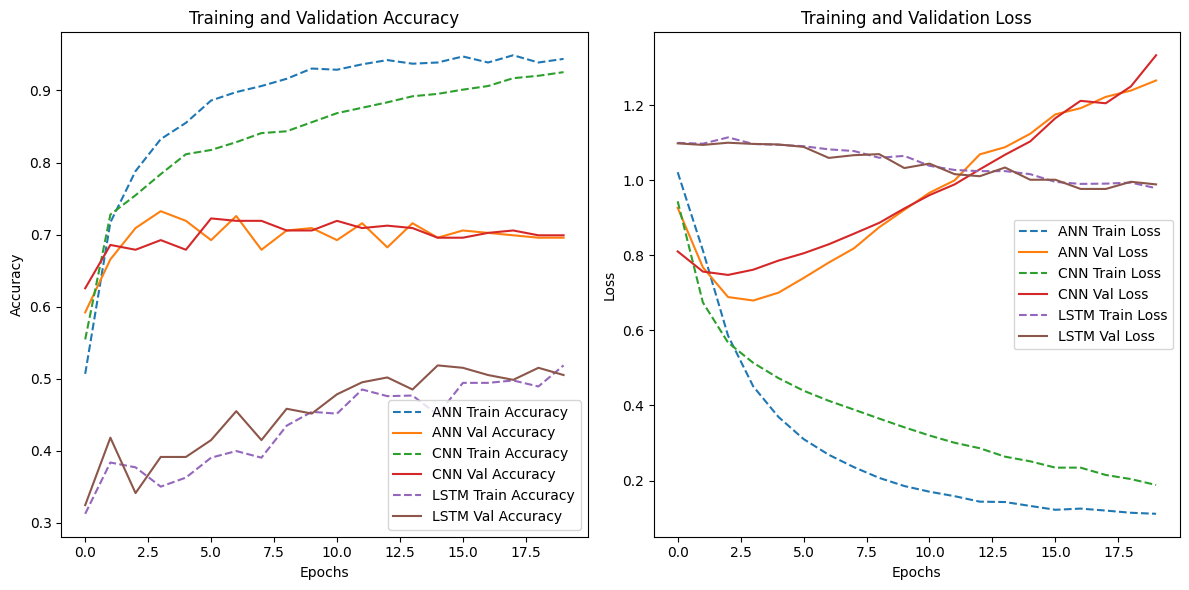

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='ANN Train Accuracy', linestyle='--')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy', linestyle='--')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy', linestyle='--')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='ANN Train Loss', linestyle='--')
plt.plot(ann_history.history['val_loss'], label='ANN Val Loss')
plt.plot(cnn_history.history['loss'], label='CNN Train Loss', linestyle='--')
plt.plot(cnn_history.history['val_loss'], label='CNN Val Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss', linestyle='--')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


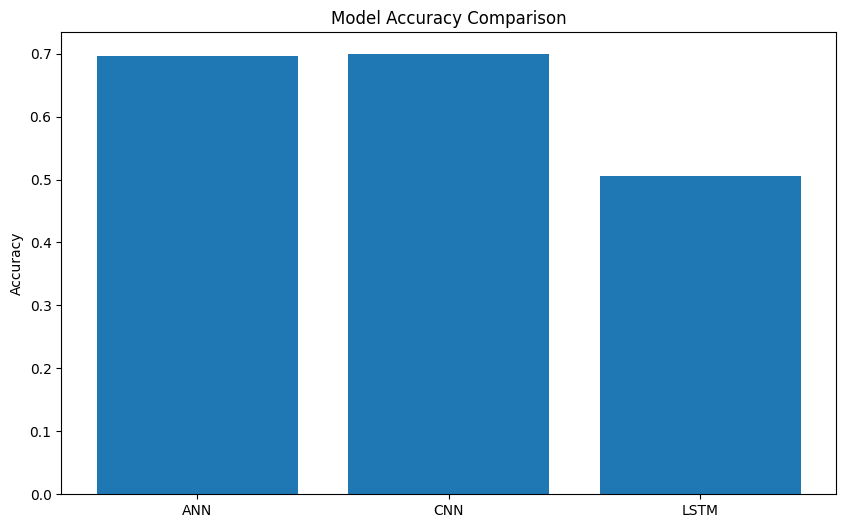

In [ ]:
# Accuracy comparison
plt.figure(figsize=(10, 6))
models = ['ANN', 'CNN', 'LSTM']
accuracies = [ann_eval[1], cnn_eval[1], lstm_eval[1]]
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# **PART 2**

## **QUESTION 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

m1 = Sequential([ Input(batch_shape=(7, 4)),  # assuming a batch size of 7

                 Dense(4, activation='sigmoid', name='Hidden_Layer_1'),
                 Dense(3, activation='relu', name='Hidden_Layer_2'),
                 Dense(3, activation='softmax', name='Output_Layer')])
m1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (7, 4)                      │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (7, 3)                      │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (7, 3)                      │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
m1.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

## **QUESTION 2**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input

m2 = Sequential([Input(batch_shape=(8, 30, 30, 1)),  #assuming batch size 8
                 Conv2D(filters=2, kernel_size=(3, 3), activation='relu', padding='same'),
                 MaxPooling2D(pool_size=(2, 2)),
                 Conv2D(filters=4, kernel_size=(3, 3), activation='relu', padding='same'),
                 MaxPooling2D(pool_size=(2, 2)),
                 Flatten(),
                 Dense(3, activation='softmax')])

m2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

m2.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (8, 30, 30, 2)              │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (8, 15, 15, 2)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (8, 15, 15, 4)              │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (8, 7, 7, 4)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (8, 196)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (8, 3)                      │             591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)